In [1]:
# Bus Card Tap on time and count from 25/07/2016 to 31/07/2016

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
tap_on = pd.read_csv("tap_on_20160725-31.csv")
tap_on.sample(10)

,mode,date,tap,time,count
1728,train,20160731,on,13:30,8699
3161,ferry,20160730,on,09:45,514
1374,train,20160730,on,23:30,2490
2973,ferry,20160729,off,21:30,154
2194,train,20160728,off,14:15,11182
2982,ferry,20160729,off,17:15,916
1047,bus,20160727,on,07:45,36739
1803,train,20160731,on,22:00,3167
1255,bus,20160725,on,01:45,120
904,bus,20160729,off,22:45,2144


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
tap_on.shape

(4602, 5)

In [5]:
tap_on.columns

Index(['mode', 'date', 'tap', 'time', 'count'], dtype='object')

In [9]:
time = tap_on['time']
count = tap_on['count']

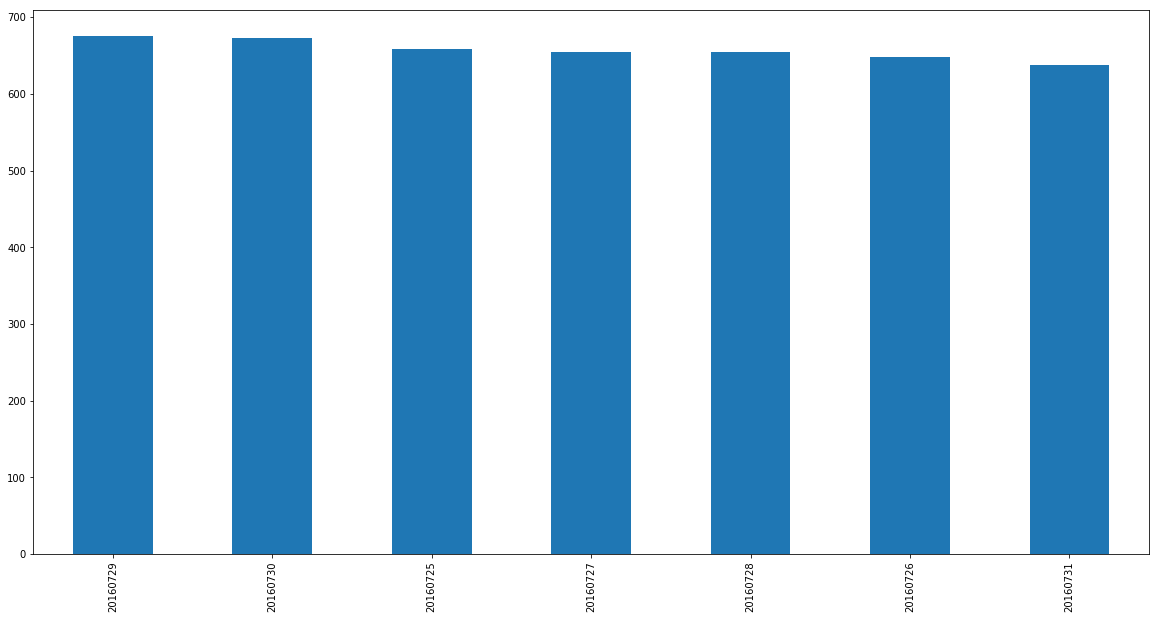

In [6]:
tap_on['date'].value_counts().plot(kind="bar")

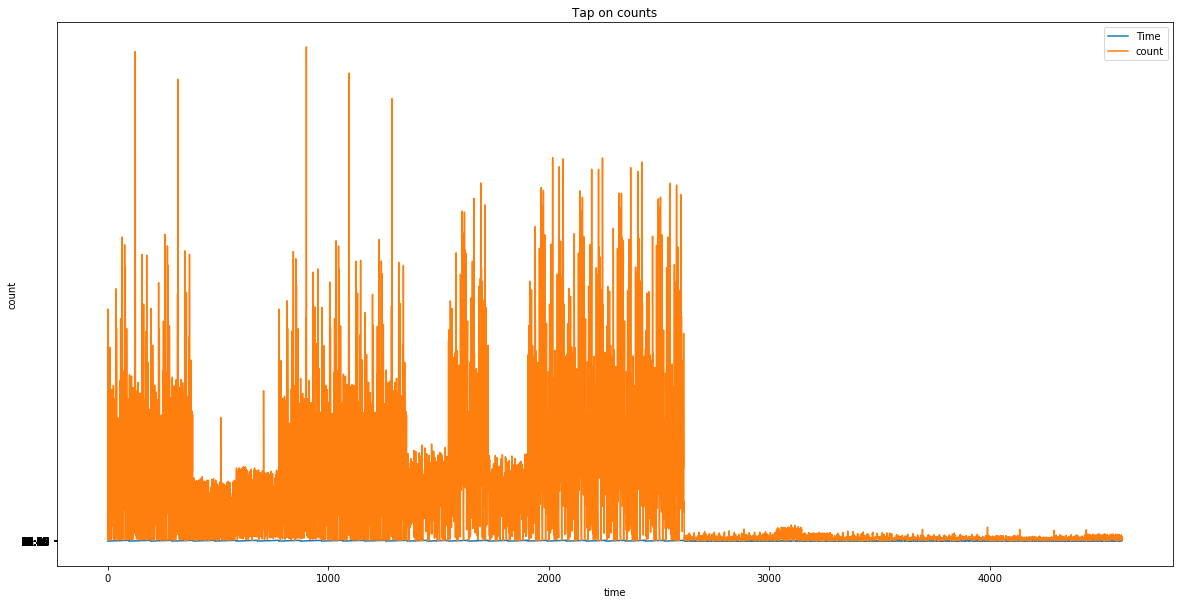

In [10]:
plt.plot(time, label='Time')
plt.plot(count, label='count')
plt.title('Tap on counts')
plt.xlabel('time')
plt.ylabel('count')
plt.legend()

plt.show()